In [2]:
import numpy as np
import scipy.stats as sts
import matplotlib.pyplot as plt
plt.style.use('ggplot')

n_tup = (10, 50, 200)
k_tup = (1, 2, 10)
m_tup = (100, 500)

#dic_kn = {(1, 10):0, (1,50):1, (1, 200):2, (2, 10):3, (2,50):4, (2, 200):5, (10, 10):6, (10, 50):7, (10, 200):8}
dic_m = {100:0, 500:1}
domain = np.linspace(0, 1, 2)

Создадим словарик-функцию распределения:

In [40]:
Dist_AD = dict()
file = open('DistFunc_values_AD.txt', 'r')
line = list(map(float, file.read().split()))
for i in range(0,len(line)-2,2):
    Dist_AD[line[i]] = line[i+1]
Dist_AD[5.1]

0.9974324

Функция распределения: 

In [38]:
def F_AD(x):
    if (x < 0.1):
        return 2.8074e-05
    elif ( x > 10):
        return 0.9999932
    else:
        return Dist_AD[round(x, 2)] #т.к. в словарике аргументы [0.1 ; 10 ] с точностью до 10^(-2)

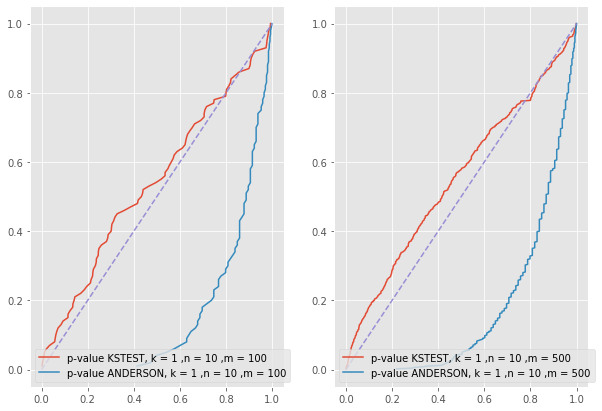

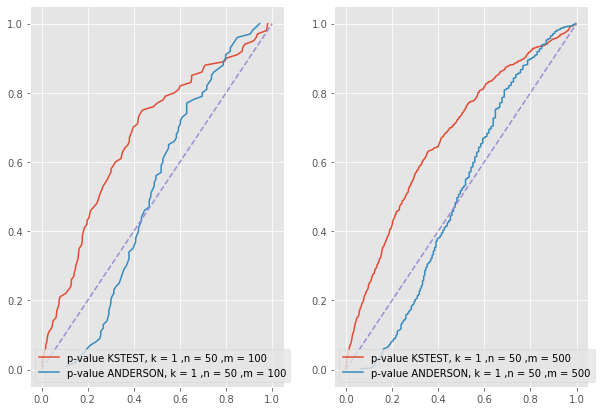

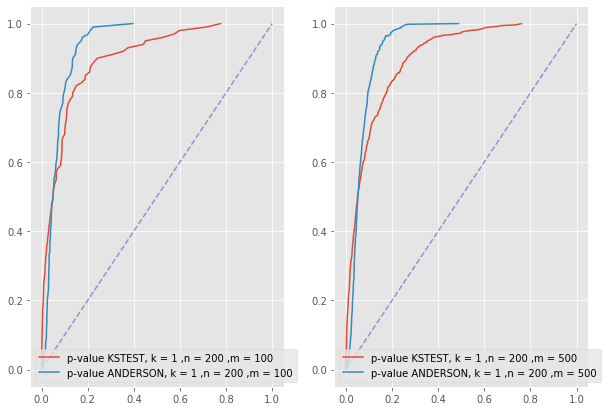

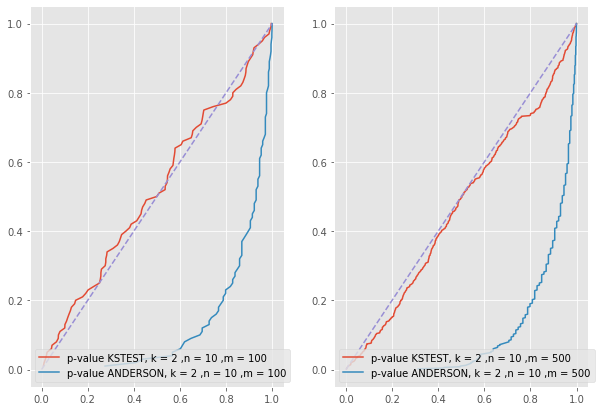

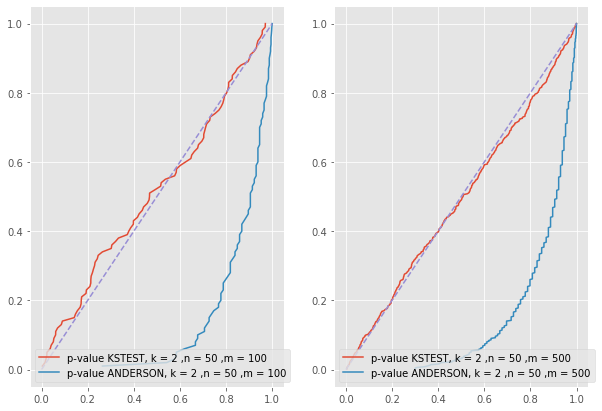

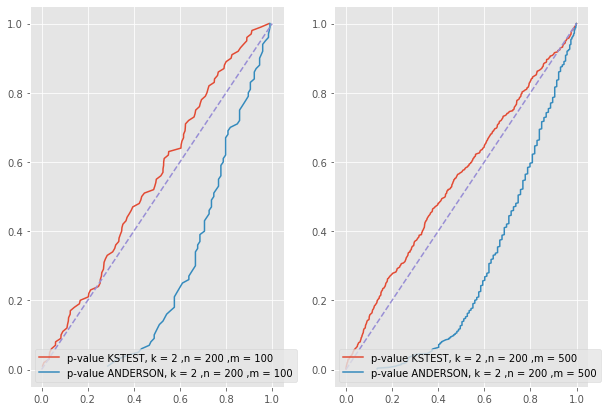

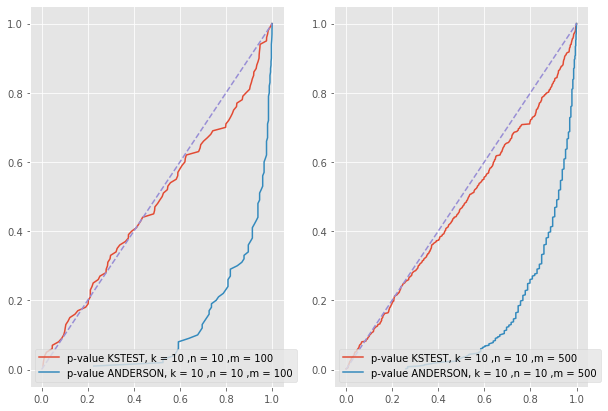

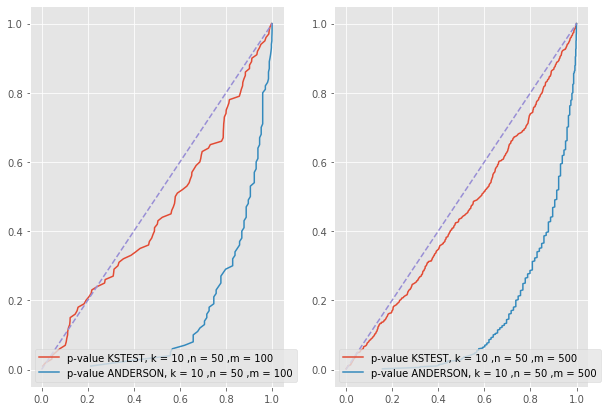

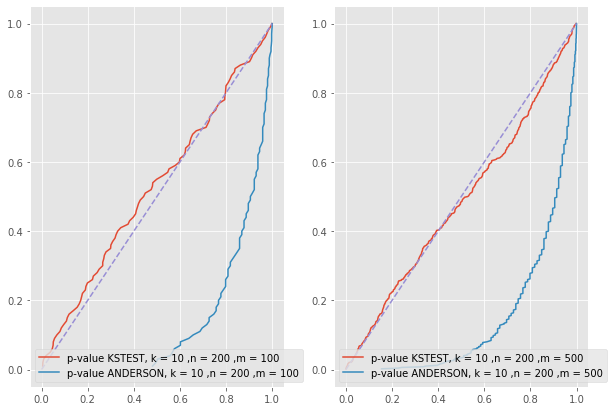

In [39]:
#fig, ax = plt.subplots(9, 2, figsize=(10, 50))
#fig.tight_layout(pad=3.0)
for k in k_tup:
    for n in n_tup:
        fig, ax = plt.subplots(1, 2, figsize=(10, 7))
        for m in m_tup:
       #     fig, ax = plt.subplots()
            points = [i/m for i in range(1, m+1)]
            pvalue_ks = []
            pvalue_and = []
            for j in range(m):
                    x_sample = []
                    
                    for i in range(n):
                        y_sample = sts.uniform.rvs(loc=0, scale=1, size=k)
                        x = sum(y_sample)
                        x_sample.append(x)
                        
                    x_sample = np.array(x_sample)
                    x_sample = (x_sample - k/2)/(k/12)**(1/2)
                    
                    pvalue_ks.append(sts.kstest(x_sample, 'norm', args=(0, 1))[1])
                    #p-value = 1 - F(T), where T - statistic 
                    pvalue_and.append(1 - F_AD(sts.anderson(x_sample,'norm')[0]))
                    
                    
            pvalue_ks.sort()
            pvalue_and.sort()
            ax[dic_m[m]].plot(pvalue_ks, points, label='p-value KSTEST, k = ' + str(k) + ' ,n = ' + str(n) + ' ,m = ' + str(m))                        
            ax[dic_m[m]].plot(pvalue_and, points, label='p-value ANDERSON, k = ' + str(k) + ' ,n = ' + str(n) + ' ,m = ' + str(m))
            ax[dic_m[m]].plot(domain, domain, '--')
            ax[dic_m[m]].legend()
        plt.show()